Shape: (95662, 16)
Columns: ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'Amount', 'Value', 'TransactionStartTime', 'PricingStrategy', 'FraudResult']
TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object

Summary statistics:
              TransactionId        BatchId       AccountId  \
count                 95662          95662           95662   
unique                95662          94809            3633  

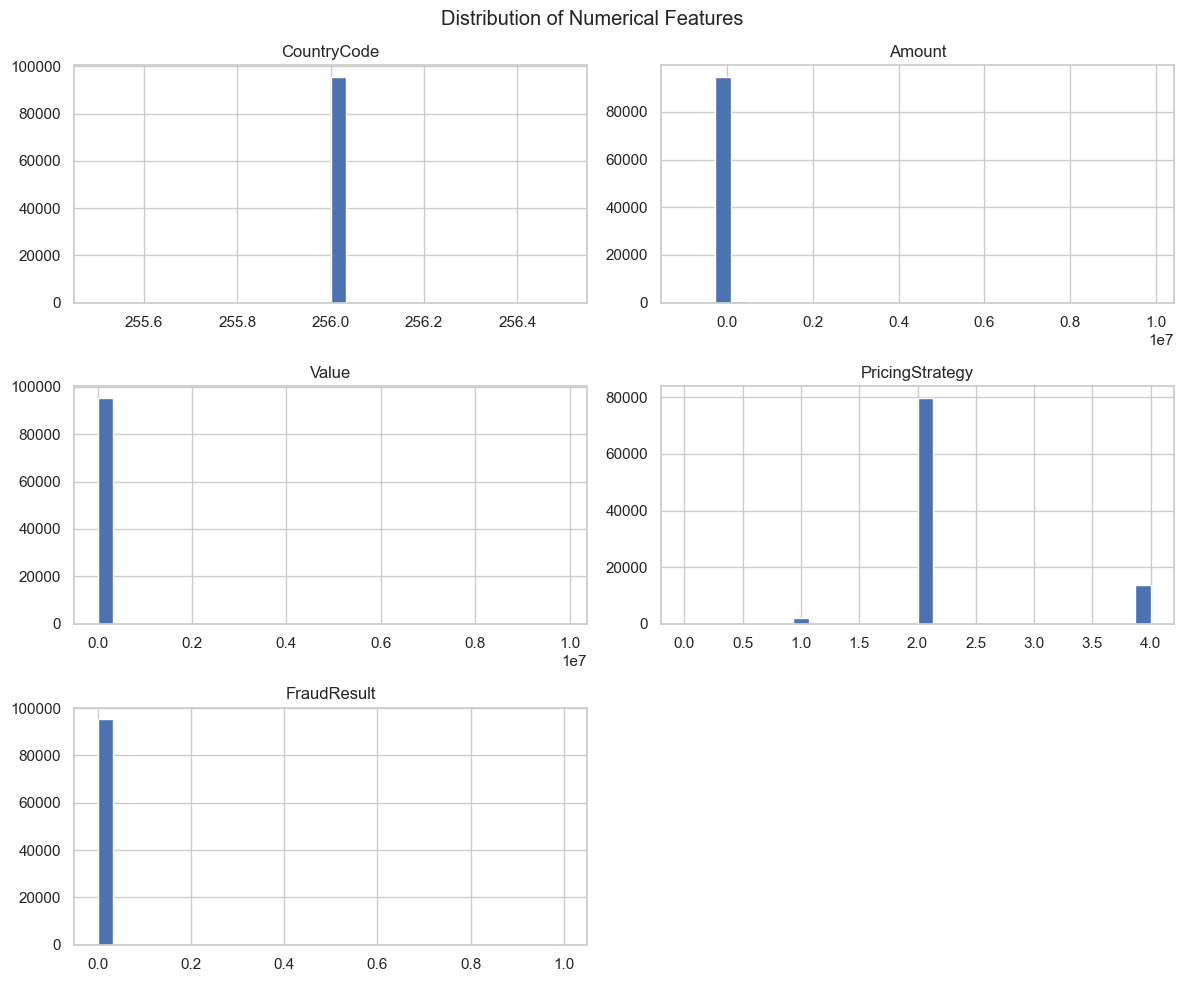

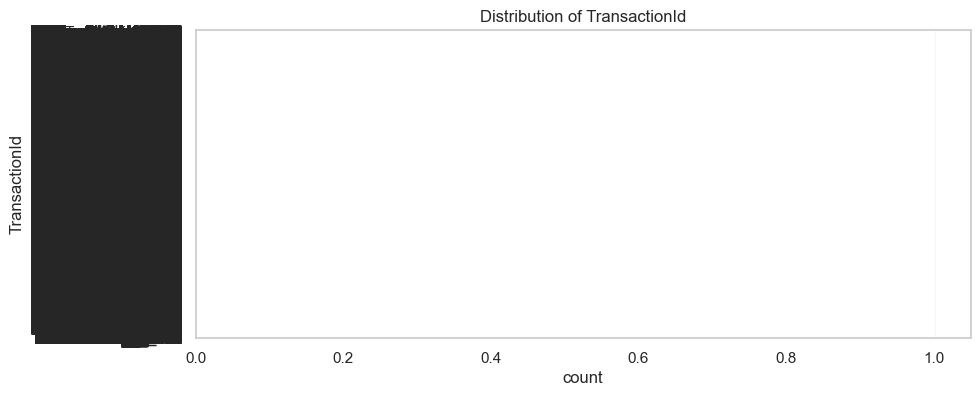

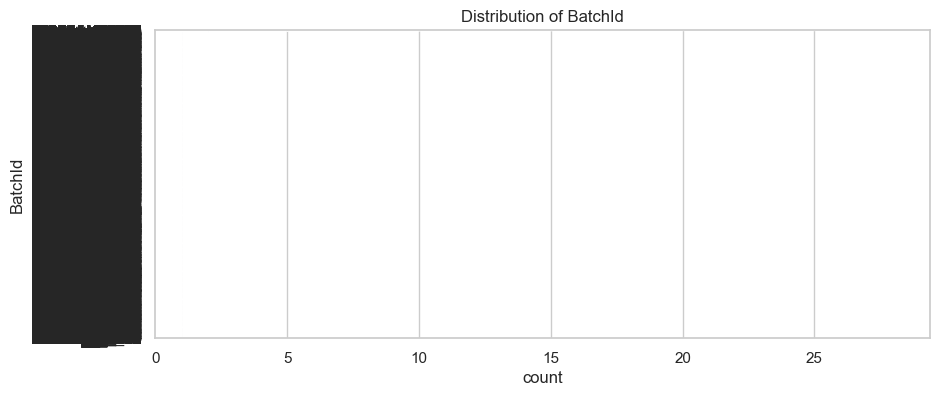

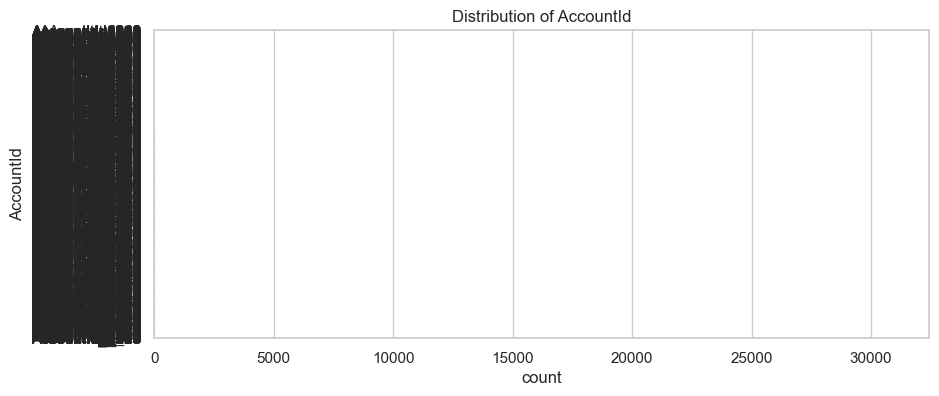

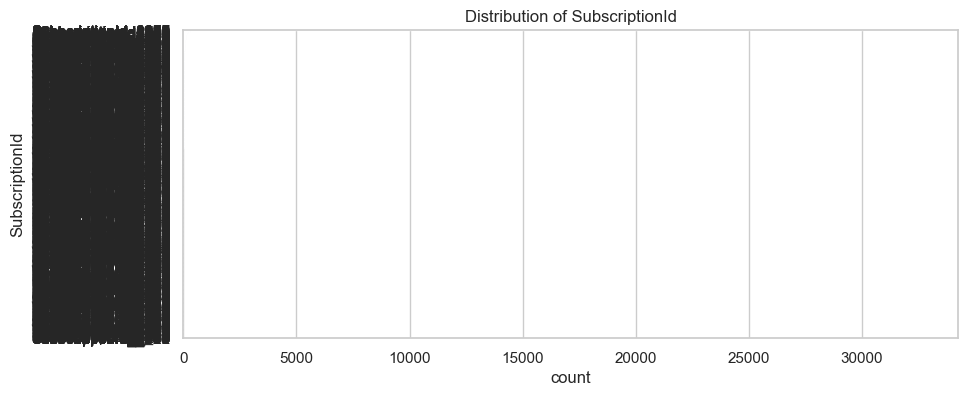

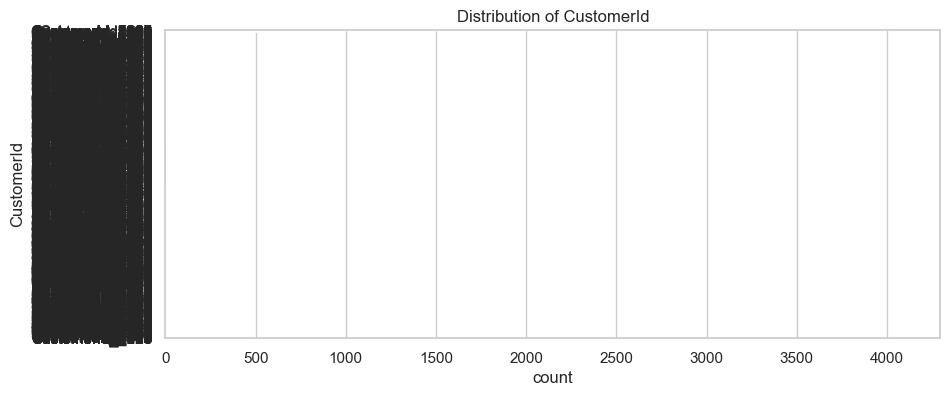

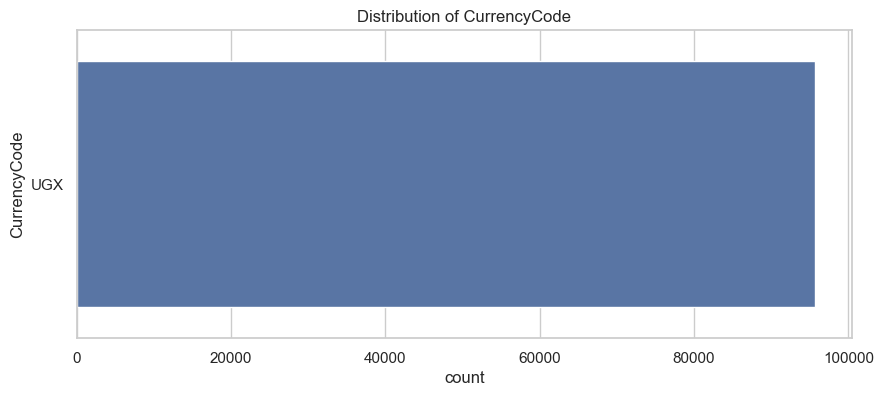

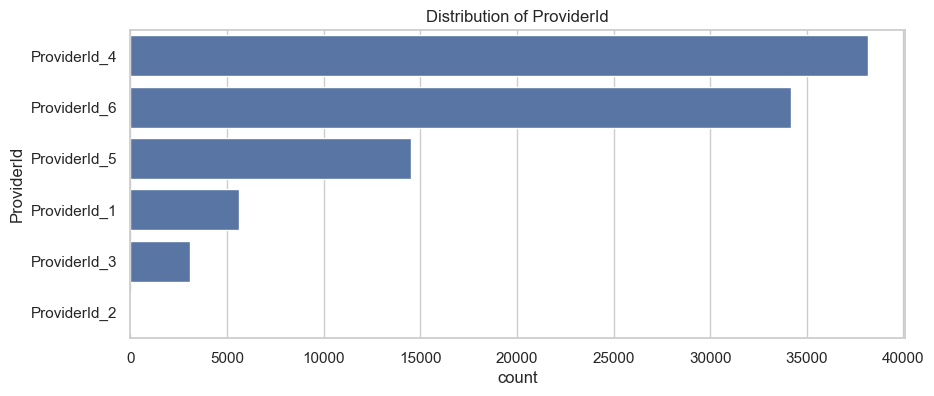

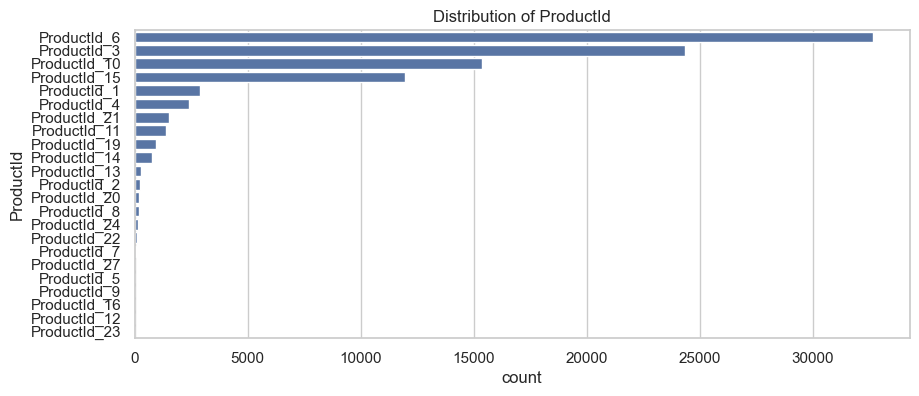

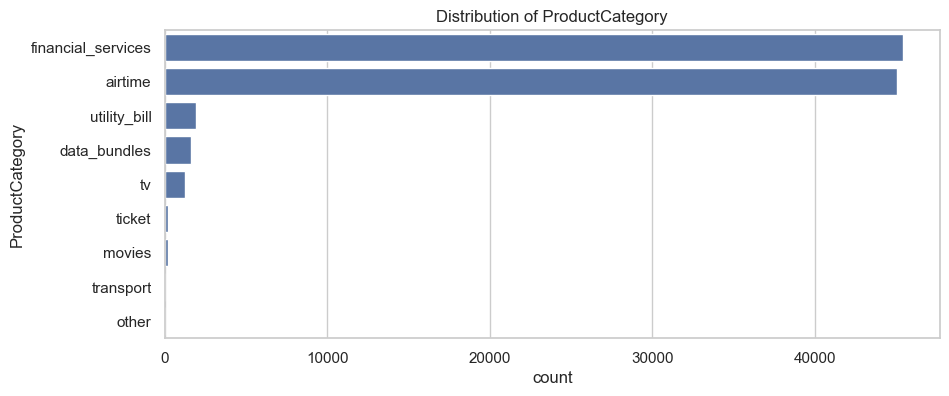

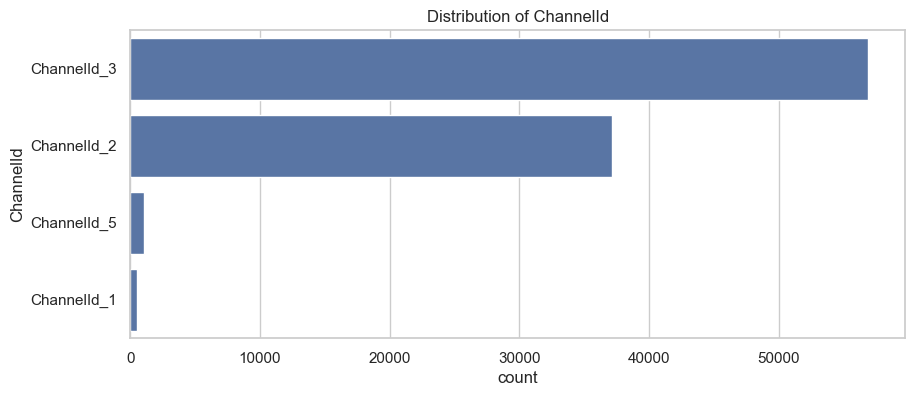

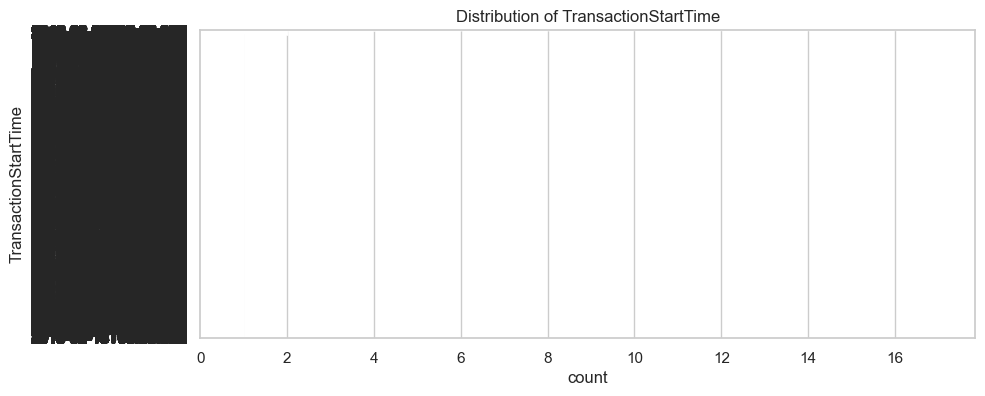

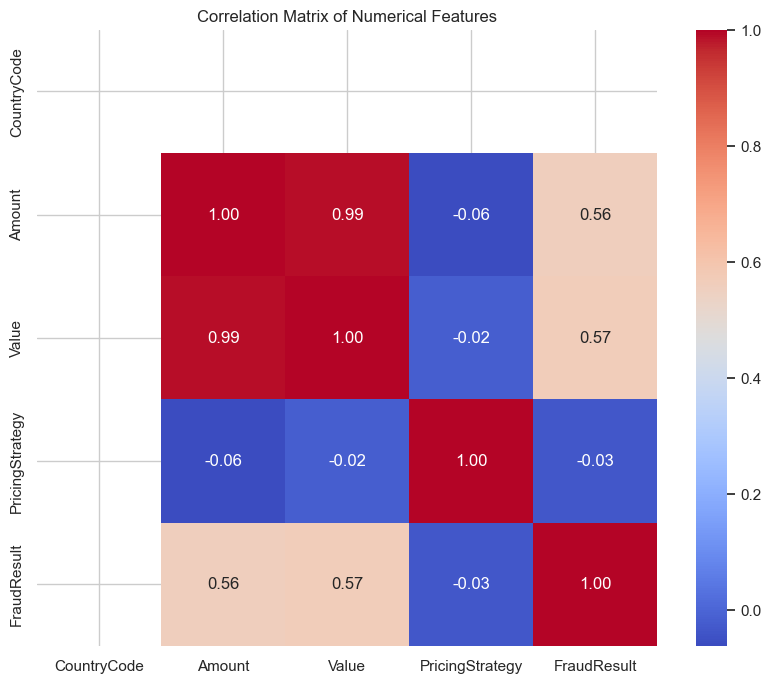


Missing Values:
Series([], dtype: int64)


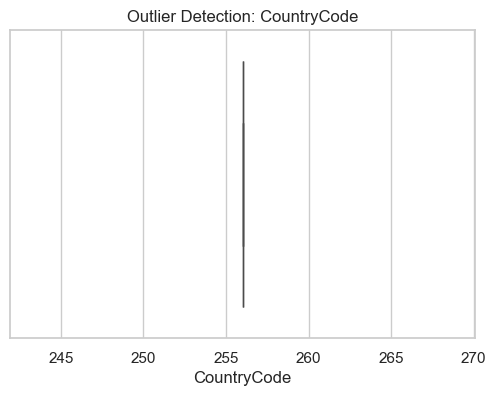

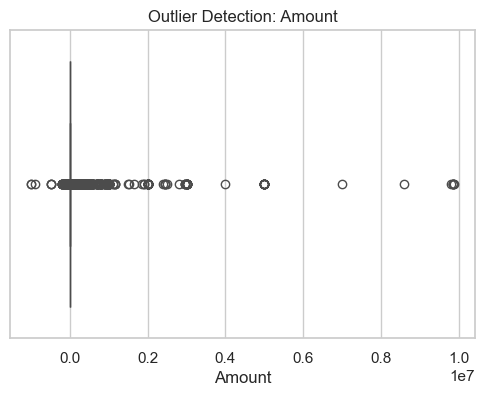

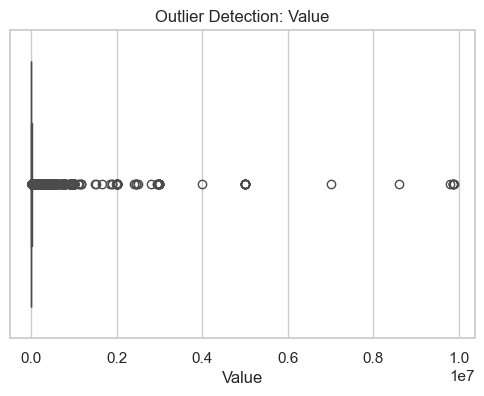

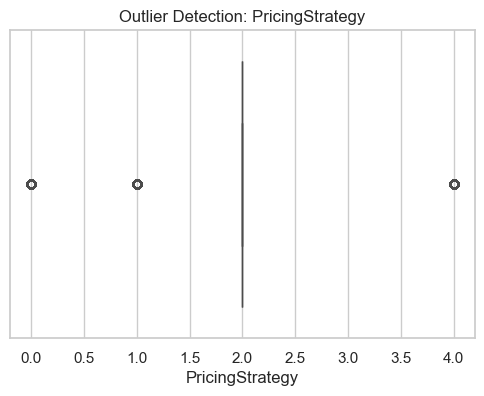

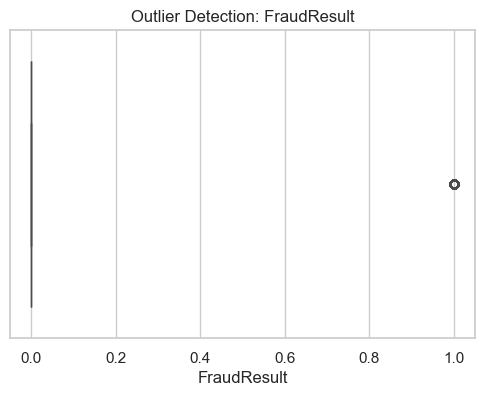

In [3]:
# notebooks/eda.ipynb (Jupyter Notebook style script)

# === EDA for Credit Risk Dataset ===
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Set styling
sns.set(style="whitegrid")

# === 1. Load and overview of the data ===
df = pd.read_csv("../data/data.csv")
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print(df.dtypes)

# === 2. Summary Statistics ===
print("\nSummary statistics:")
print(df.describe(include='all'))

# === 3. Distribution of Numerical Features ===
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

df[numeric_cols].hist(figsize=(12, 10), bins=30)
plt.suptitle("Distribution of Numerical Features")
plt.tight_layout()
plt.show()

# === 4. Distribution of Categorical Features ===
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.show()

# === 5. Correlation Analysis ===
plt.figure(figsize=(10, 8))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

# === 6. Identifying Missing Values ===
missing = df.isnull().sum()
missing = missing[missing > 0]
print("\nMissing Values:")
print(missing)

# === 7. Outlier Detection (Boxplots) ===
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Outlier Detection: {col}")
    plt.show()

# === 8. Insights (to include in markdown later) ===
# 1. Amount and Value distributions are skewed with clear outliers.
# 2. Some categorical columns (like ProductCategory) are imbalanced.
# 3. A few customers appear multiple times – frequent users?
# 4. Correlation between Amount and Value is nearly perfect (expected).
# 5. Missing values detected in ChannelId and others – imputation needed.
